In [1]:
import pandas as pd
from pyxlsb import open_workbook, convert_date
import matplotlib.pyplot as plt 
import seaborn as sns 


file_path = '../../data/ecommerce_sales.xlsb'
sheet_name = '20210614 Ecommerce sales'

In [2]:
def read_xlsb(file_path, sheet_name):
    data = []
    with open_workbook(file_path) as wb:
        with wb.get_sheet(sheet_name) as sheet:
            for idx,row in enumerate(sheet.rows()):
                if idx == 0:
                    data.append([item.v for item in row])
                else:
                    data.append([item.v if item.c != 5 else convert_date(item.v) for item in row ])
    df = pd.DataFrame(data[1:], columns=data[0])
    return df

In [3]:
data = read_xlsb(file_path, sheet_name)

In [4]:
data.head()

,Cod_cmd,Libellé produit,Vendeur,Univers,Nature,Date de commande,Montant cmd,Quantité,Prix transport,Délai transport annoncé
0,182210782.0,Table basse carrée detroit design industriel,Autre vendeur,Canapé Salon Séjour,Table basse,2021-01-20,244.0,4.0,6.67,10.0
1,182082437.0,Ours en peluche géant 150 cm brun,Autre vendeur,Enfant Bébé,Peluche,2021-01-17,28.0,1.0,9.92,10.0
2,182095765.0,Ours en peluche géant 100 cm blanc,Autre vendeur,Enfant Bébé,Peluche,2021-01-18,15.0,1.0,9.92,10.0
3,182615392.0,Lot de 4 chaises mia noires pour salle à manger,Autre vendeur,Canapé Salon Séjour,Chaise,2021-01-23,385.0,2.0,20.75,10.0
4,184222081.0,Meuble tv falko bois blanc et gris,Autre vendeur,Canapé Salon Séjour,Meuble tv,2021-02-11,61.0,1.0,19.08,10.0


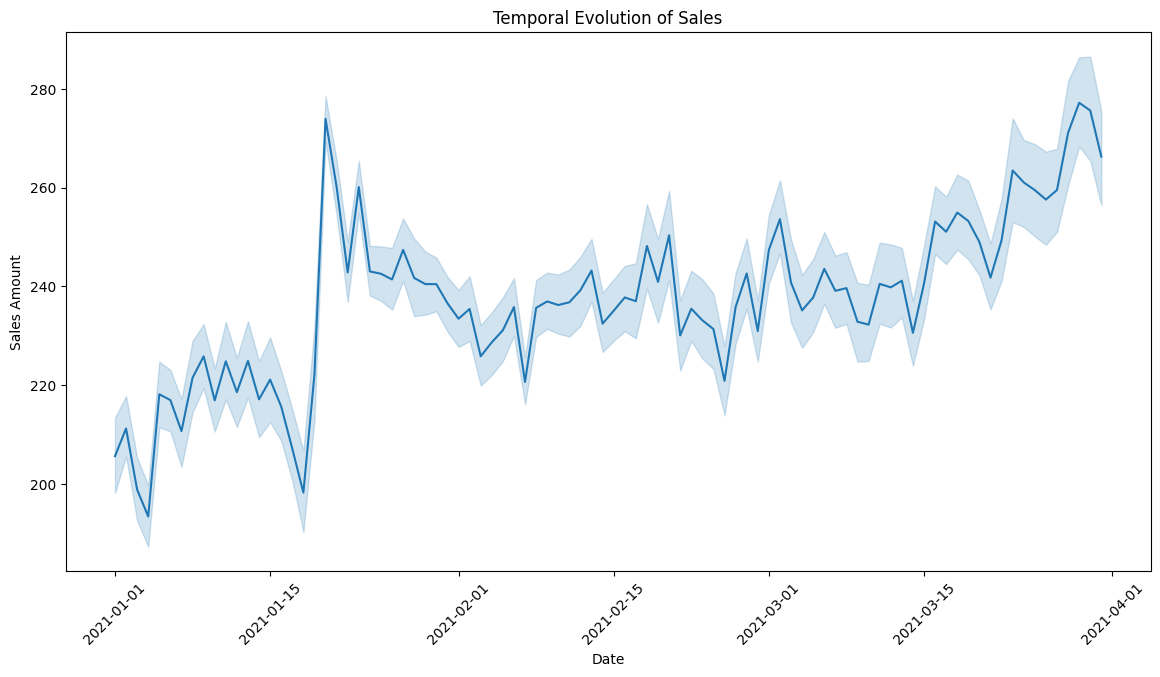

In [5]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='Date de commande', y='Montant cmd')
plt.title('Temporal Evolution of Sales')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

1. The Graph shows the upward trend in the sales overtime 
2. The Highest sales were in mid of January 

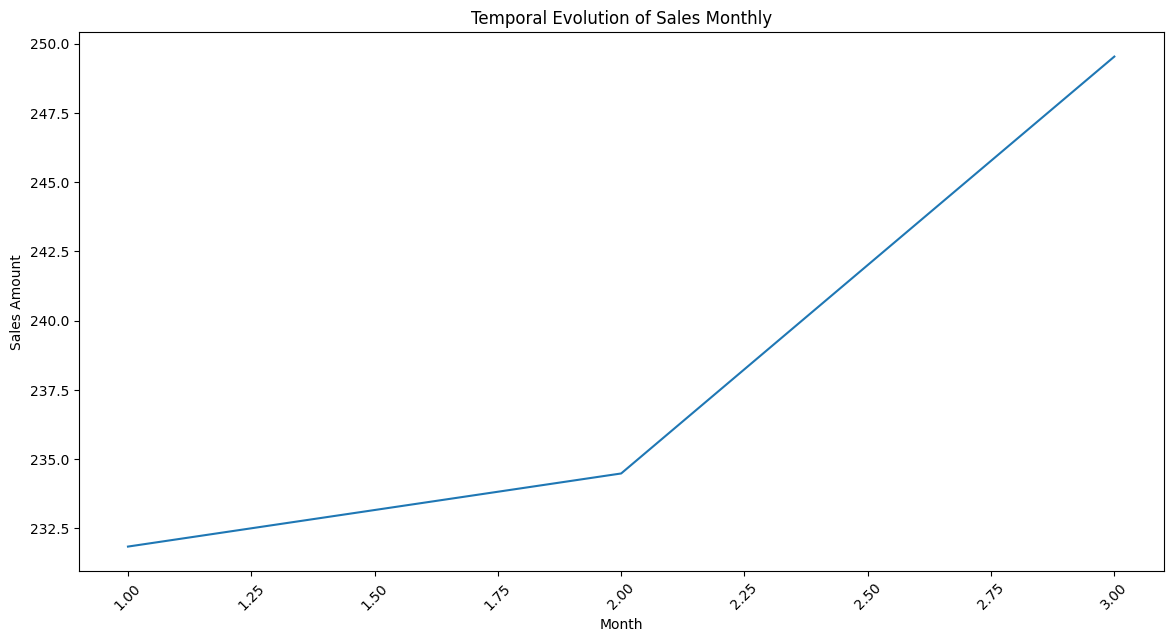

In [6]:
data['Month'] = data['Date de commande'].dt.month

monthly_sales = data.groupby('Month')['Montant cmd'].mean().reset_index()



plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month', y='Montant cmd')
plt.title('Temporal Evolution of Sales Monthly')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

Average sales amount per month 
1. Sales were relatively flat for the first two months, then significantly increased in the third month.
2. The data shows the positive trend for the sales.

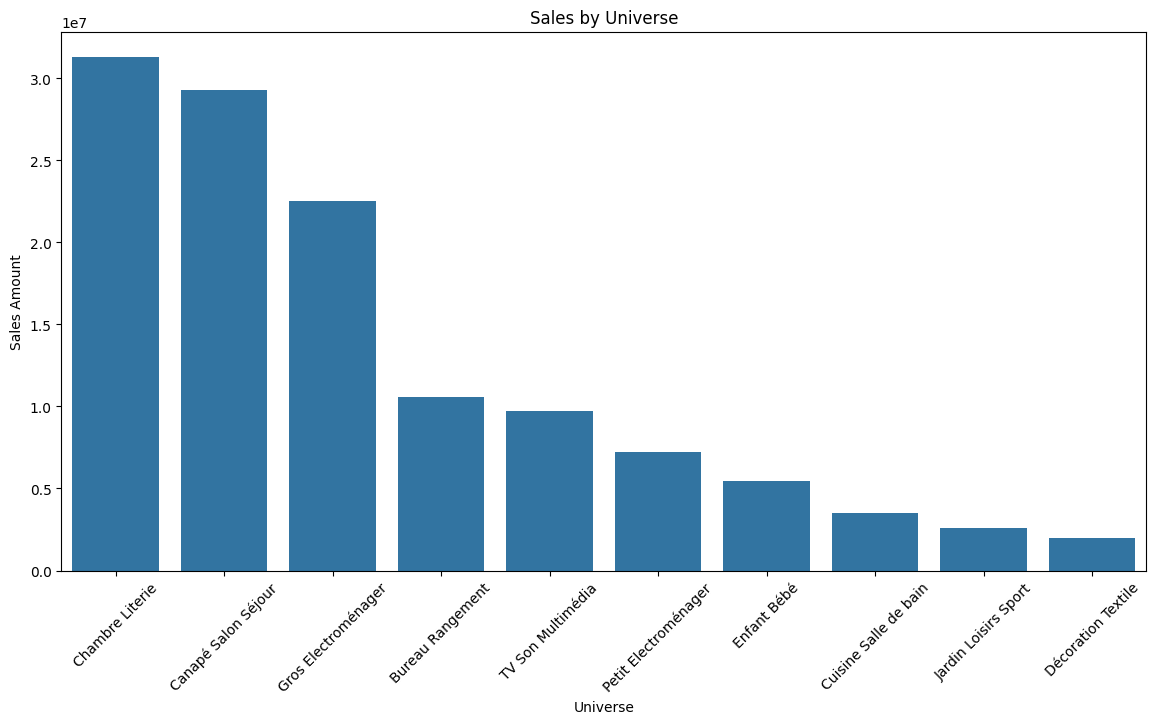

In [7]:
universe_sales = data.groupby('Univers')['Montant cmd'].sum().reset_index().sort_values(by='Montant cmd', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(data=universe_sales, x='Univers', y='Montant cmd')
plt.title('Sales by Universe')
plt.xlabel('Universe')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()


1. Universe with the highest amount of sales is Chambre Literie followed by Canapé Salon Séjour and Gros Electroménager.
2. Universe with the lowest sales is Décoration Textile

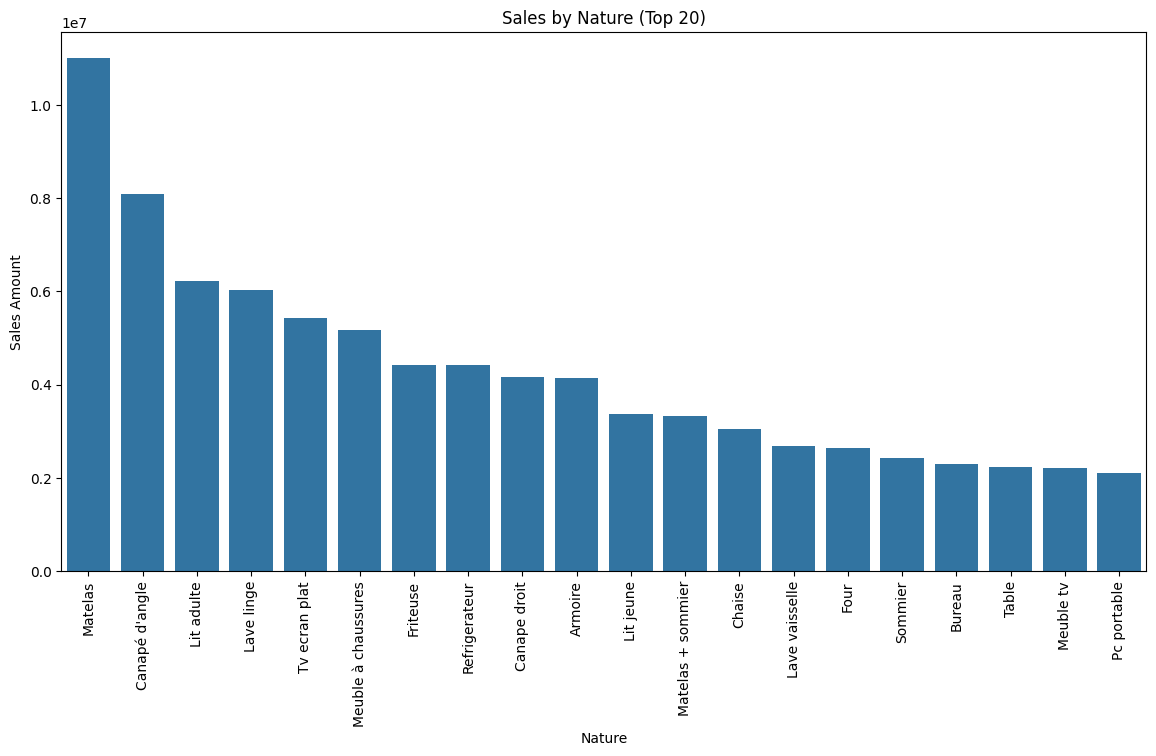

In [8]:
nature_sales = data.groupby('Nature')['Montant cmd'].sum().reset_index().sort_values(by='Montant cmd', ascending=False)


plt.figure(figsize=(14, 7))
sns.barplot(data=nature_sales.head(20), x='Nature', y='Montant cmd')
plt.title('Sales by Nature (Top 20)')
plt.xlabel('Nature')
plt.ylabel('Sales Amount')
plt.xticks(rotation=90)
plt.show()

Sales of Top 20 Category
1. Matelas with over 10 million in sales.
2. Second and third highest sales are Canapé d'angle and Lit adulte

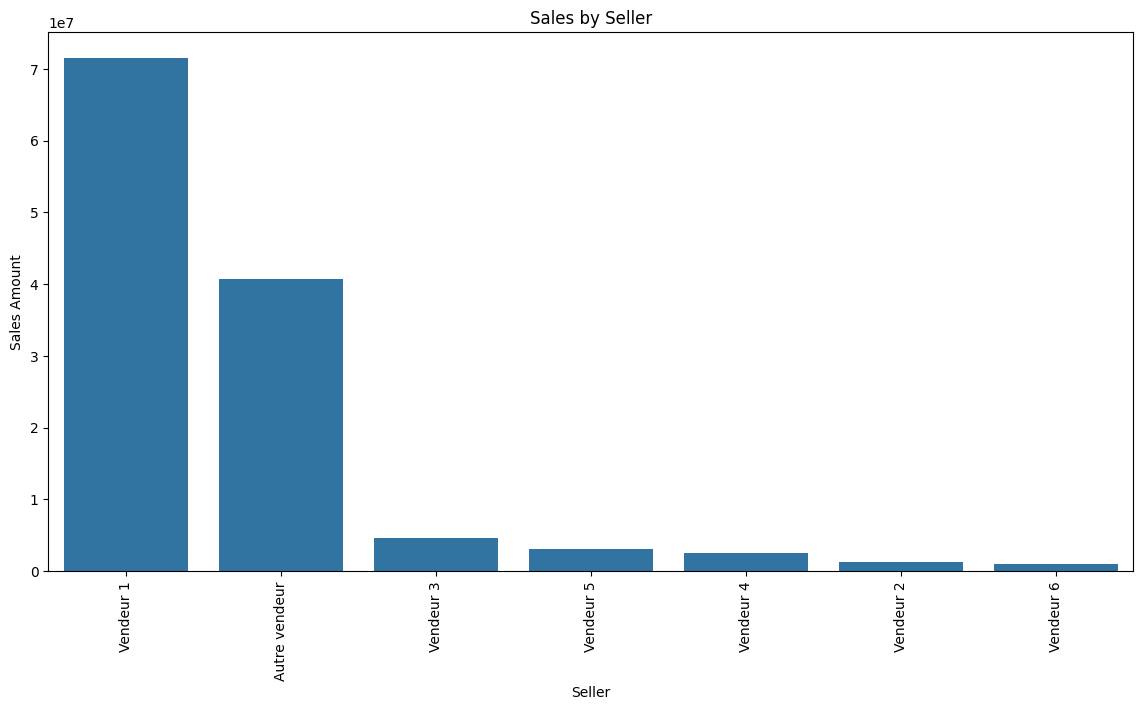

In [9]:
seller_sales = data.groupby('Vendeur')['Montant cmd'].sum().reset_index().sort_values(by='Montant cmd', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(data=seller_sales, x='Vendeur', y='Montant cmd')
plt.title('Sales by Seller')
plt.xlabel('Seller')
plt.ylabel('Sales Amount')
plt.xticks(rotation=90)
plt.show()

1. Vendeur 1 has the highest sales amount, followed by Autre vendeur, Vendeur 3, Vendeur 5, Vendeur 4, Vendeur 2, and Vendeur 6.
2. Vendeur 1 is the most successful seller.

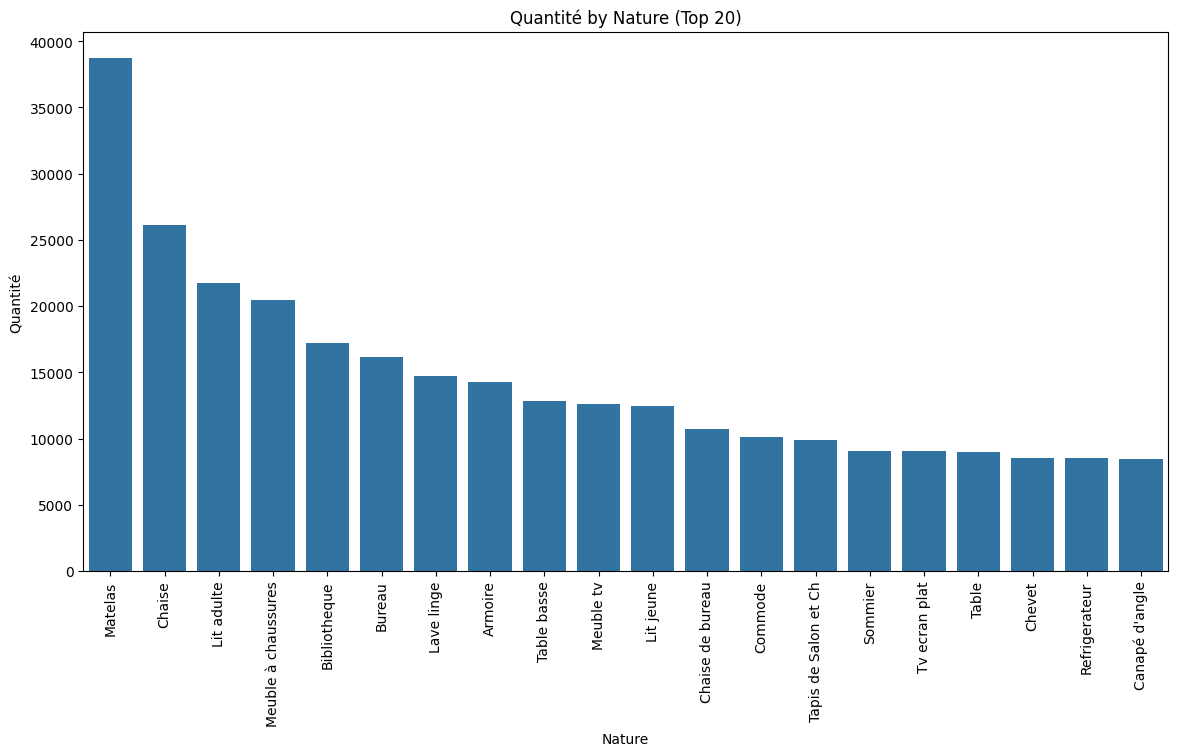

In [10]:
nature_sales = data.groupby('Nature')['Quantité'].sum().reset_index().sort_values(by='Quantité', ascending=False)


plt.figure(figsize=(14, 7))
sns.barplot(data=nature_sales.head(20), x='Nature', y='Quantité')
plt.title('Quantité by Nature (Top 20)')
plt.xlabel('Nature')
plt.ylabel('Quantité')
plt.xticks(rotation=90)
plt.show()

1. The top product category is Matelas with a quantity of around 39000 units.
2. Canapé d'angle sales are 2nd highest but its quanity is sold 8800 units (bottom in top 20). 

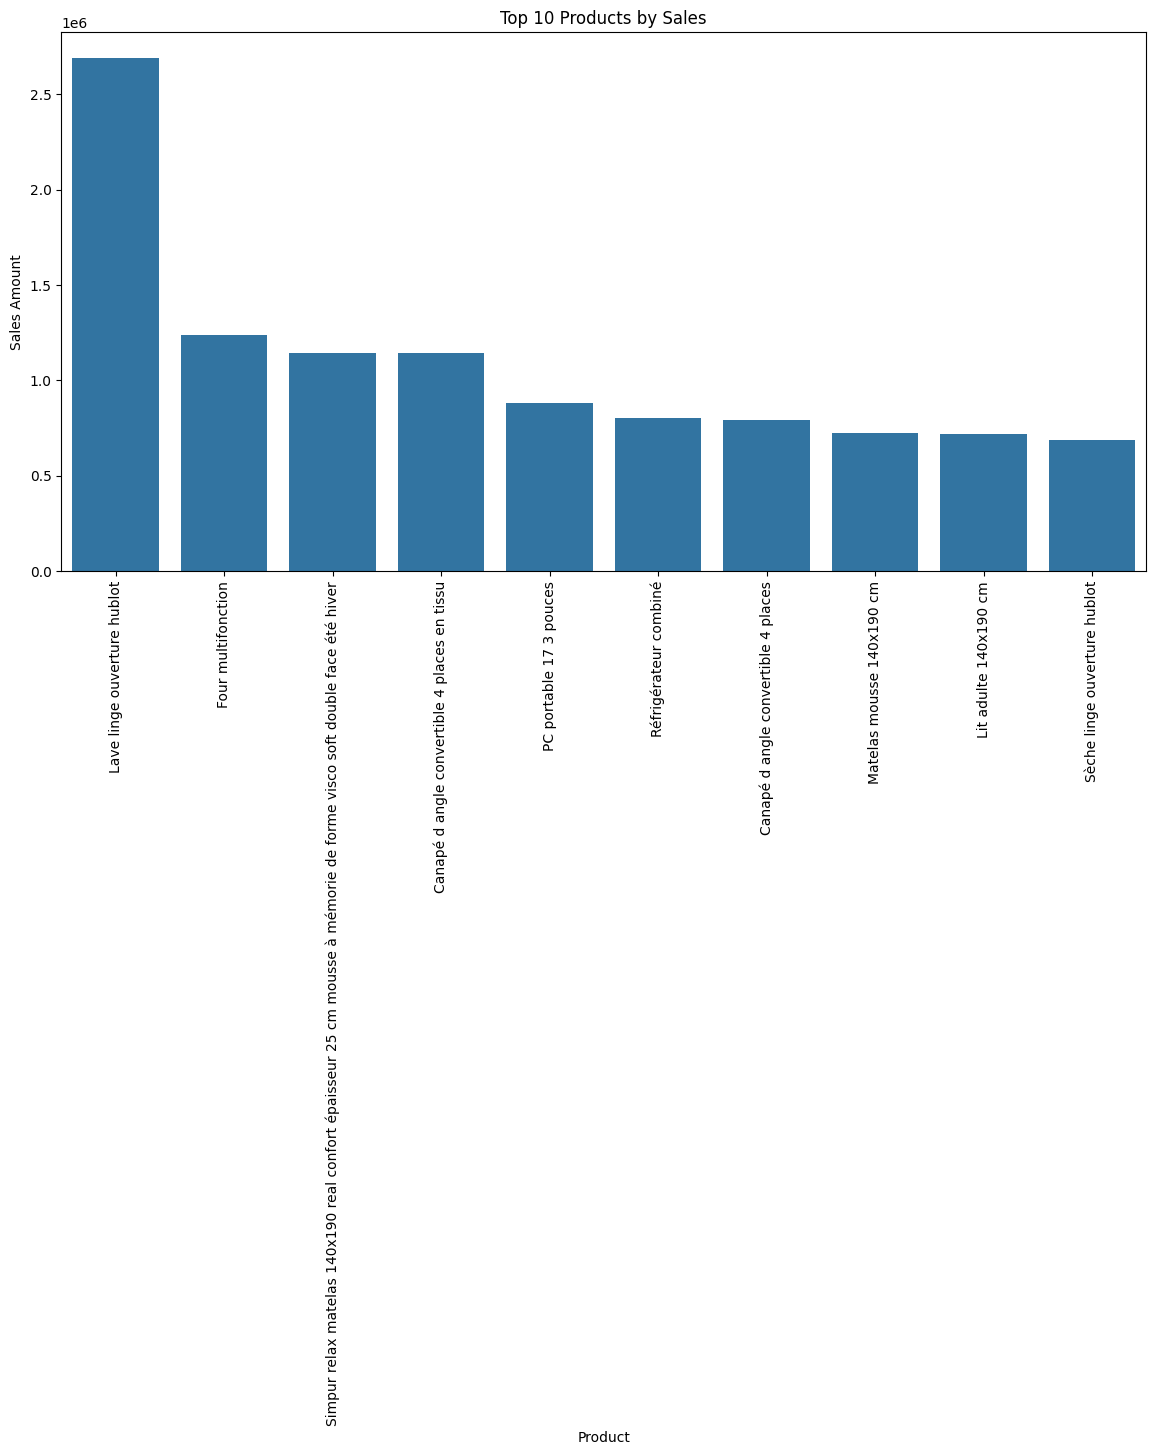

In [11]:

product_sales = data.groupby('Libellé produit')['Montant cmd'].sum().reset_index()

top_products = product_sales.nlargest(10, 'Montant cmd')

# Plot top products
plt.figure(figsize=(14, 7))
sns.barplot(data=top_products, x='Libellé produit', y='Montant cmd')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Sales Amount')
plt.xticks(rotation=90)
plt.show()